# Task 3

## Exploiting Correlation in Financial data

### Introduction

Financial data analysis often involves understanding how meaningful factors can be used to summarize or represent the data. This report explores the role that correlation and principal components play in this process. We will generate synthetic data, perform Principal Component Analysis (PCA), and compare the results with real-world government security yield data.

**Synthetic Data Analysis**

**(a) Generate 5 uncorrelated Gaussian random variables**

To simulate yield changes, we generate 5 uncorrelated Gaussian random variables with a mean close to 0 and a small standard deviation.

In [1]:
import numpy as np

# Generate 5 uncorrealted Gaussian random variables
mean = 0
std_dev = 0.01
np.random.seed(0)
data = np.random.normal(mean, std_dev, (100, 5))
print(data)

[[ 1.76405235e-02  4.00157208e-03  9.78737984e-03  2.24089320e-02
   1.86755799e-02]
 [-9.77277880e-03  9.50088418e-03 -1.51357208e-03 -1.03218852e-03
   4.10598502e-03]
 [ 1.44043571e-03  1.45427351e-02  7.61037725e-03  1.21675016e-03
   4.43863233e-03]
 [ 3.33674327e-03  1.49407907e-02 -2.05158264e-03  3.13067702e-03
  -8.54095739e-03]
 [-2.55298982e-02  6.53618595e-03  8.64436199e-03 -7.42165020e-03
   2.26975462e-02]
 [-1.45436567e-02  4.57585173e-04 -1.87183850e-03  1.53277921e-02
   1.46935877e-02]
 [ 1.54947426e-03  3.78162520e-03 -8.87785748e-03 -1.98079647e-02
  -3.47912149e-03]
 [ 1.56348969e-03  1.23029068e-02  1.20237985e-02 -3.87326817e-03
  -3.02302751e-03]
 [-1.04855297e-02 -1.42001794e-02 -1.70627019e-02  1.95077540e-02
  -5.09652182e-03]
 [-4.38074302e-03 -1.25279536e-02  7.77490356e-03 -1.61389785e-02
  -2.12740280e-03]
 [-8.95466561e-03  3.86902498e-03 -5.10805138e-03 -1.18063218e-02
  -2.81822283e-04]
 [ 4.28331871e-03  6.65172224e-04  3.02471898e-03 -6.34322094e-03

**(b) Run a Pricipal Components(PCA)**

We perform PCA using the correlation matrix since the variables are uncorrelated.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Run PCA
pca = PCA()
pca.fit(data_standardized)


PCA()

**(c) Explain the Variance of Each component**

The explained variance ratio tells us how much variance in the data is explained by each principal component

In [10]:
# c. Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by Component 1: {explained_variance[0]:.2f}")
print(f"Explained variance by Component 2: {explained_variance[1]:.2f}")
print(f"Explained variance by Component 3: {explained_variance[2]:.2f}")

Explained variance by Component 1: 0.25
Explained variance by Component 2: 0.23
Explained variance by Component 3: 0.21


**Explanation:**

The first principal component explains the highest amount of variance, followed by the second and third components. The cumulative explained variance gives an idea of how much total variance is captured by the first few components.

**(d) Produce a screeplot**

A scree plot helps to visually assess the importance of each principal component.

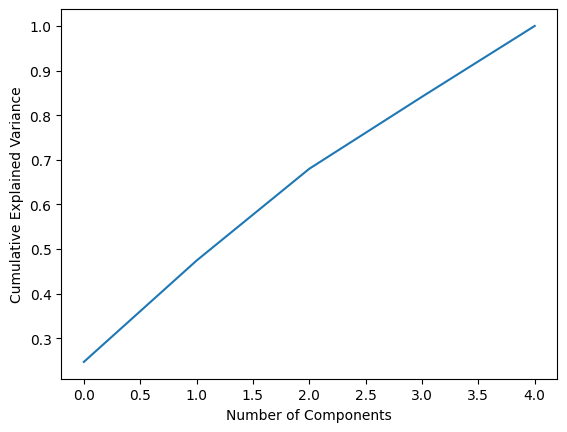

In [3]:
import matplotlib.pyplot as plt

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig("figure/scree_plot_random_data.png")
plt.show()

## Real data Analysis

**(e)Collect aily closing yields for 5 government securities**

We collect daily closing yields for 5 US government securities over the last 6 months using the FRED API.

In [5]:
import pandas as pd
from fredapi import Fred

# FRED API key
fred = Fred(api_key="95eb212842318d85c6198945d6514bf4")

# List of FRED series IDs for 5 US government securities
series_ids = ['DGS1MO',  'DGS3MO',  'DGS6MO',  'DGS1', 'DGS2']


#Define the date range for the last 6 months
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.DateOffset(months=6)).strftime('%Y-%m-%d')

# Collect the data
data = {}
for series_id in series_ids:
    data[series_id] = fred.get_series(series_id, start_date, end_date)


# Convert to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('data/us_government_securities_yields.csv')

            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2
2024-07-22    5.49    5.43    5.24  4.88  4.50
2024-07-23    5.49    5.41    5.22  4.85  4.40
2024-07-24    5.50    5.40    5.19  4.82  4.37
2024-07-25    5.49    5.39    5.19  4.83  4.41
2024-07-26    5.49    5.38    5.18  4.79  4.36
...            ...     ...     ...   ...   ...
2025-01-13    4.42    4.37    4.30  4.24  4.40
2025-01-14    4.42    4.36    4.29  4.22  4.37
2025-01-15    4.40    4.35    4.26  4.19  4.27
2025-01-16    4.43    4.34    4.26  4.18  4.23
2025-01-17    4.43    4.34    4.28  4.21  4.27

[130 rows x 5 columns]


**(f) Compute the daily yield changes**

In [6]:
daily_changes = df.diff()
print(daily_changes)

            DGS1MO  DGS3MO  DGS6MO  DGS1  DGS2
2024-07-22     NaN     NaN     NaN   NaN   NaN
2024-07-23    0.00   -0.02   -0.02 -0.03 -0.10
2024-07-24    0.01   -0.01   -0.03 -0.03 -0.03
2024-07-25   -0.01   -0.01    0.00  0.01  0.04
2024-07-26    0.00   -0.01   -0.01 -0.04 -0.05
...            ...     ...     ...   ...   ...
2025-01-13    0.00    0.01    0.03 -0.01  0.00
2025-01-14    0.00   -0.01   -0.01 -0.02 -0.03
2025-01-15   -0.02   -0.01   -0.03 -0.03 -0.10
2025-01-16    0.03   -0.01    0.00 -0.01 -0.04
2025-01-17    0.00    0.00    0.02  0.03  0.04

[130 rows x 5 columns]


**(g) Re-run PCA using the correlation Matrix**

In [7]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Perform PCA
pca = PCA(n_components=len(series_ids))
pca.fit(corr_matrix)


PCA(n_components=5)

**(h) Explain the variance of each component**

In [8]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)

Explained variance by each component: [9.37487603e-01 6.24465507e-02 5.99912996e-05 5.85461747e-06
 1.18932054e-33]


**(i) Produce a scree plot**

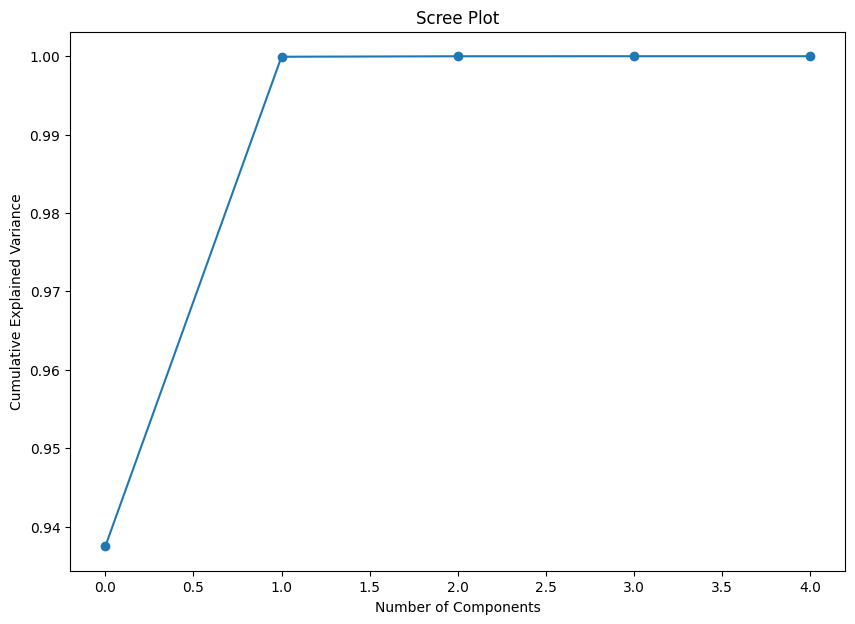

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.savefig("figure/scree_plot_real_data.png")
plt.show()


**(j) Compare Scree Plots**

The scree plot from the uncorrelated data shows a more even distribution of explained variance across the components, indicating that no single component dominates. In contrast, the scree plot from the government data likely shows a steeper decline, indicating that the first few components explain a significant portion of the variance. This difference highlights the structured nature of real-world financial data compared to random, uncorrelated data.

**References**

- Federal Reserve Economic Data (FRED). (n.d.). Federal Reserve Bank of St. Louis. Retrieved from [https://fred.stlouisfed.org/](https://fred.stlouisfed.org/)
- Scree plot. (n.d.). In Wikipedia. Retrieved from [https://en.wikipedia.org/wiki/Scree_plot](https://en.wikipedia.org/wiki/Scree_plot)